In [8]:
import pandas as pd
from SqlAlquemyInsertMarketDataHandler import SqlAlquemyInsertMarketDataHandler

from dotenv import load_dotenv
load_dotenv()

True

In [14]:
msci_indexes = pd.read_csv('msci_indexes.csv', parse_dates=True, index_col=0, thousands=',')
msci_indexes

,Finland,Denmark,Norway,Brazil,China,India,Korea,South Africa,Taiwan,ACWI
1999-01-01,431.100,1934.40,934.273,550.538,30.360,80.370,83.318,127.752,231.536,273.301
1999-01-04,456.036,2000.72,1000.130,546.000,29.777,82.225,88.745,127.486,232.022,276.123
1999-01-05,461.883,1994.98,1016.820,549.244,29.455,83.248,92.869,130.769,221.975,278.925
1999-01-06,459.394,1985.66,1043.260,562.391,30.289,84.914,95.440,140.872,225.844,284.216
1999-01-07,470.268,1940.68,1026.770,541.313,30.967,87.228,100.888,137.936,234.799,283.458
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,504.497,21617.38,2416.040,1778.910,52.897,905.527,491.608,395.657,615.916,721.295
2023-12-26,505.138,21646.80,2418.460,1802.530,52.907,909.551,496.518,392.514,623.796,723.775
2023-12-27,511.530,21782.83,2475.320,1811.260,53.774,914.809,501.073,412.585,633.352,727.287
2023-12-28,509.832,21948.23,2449.480,1806.410,55.270,922.066,511.085,407.652,638.660,728.753


c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a Dat

<Axes: >

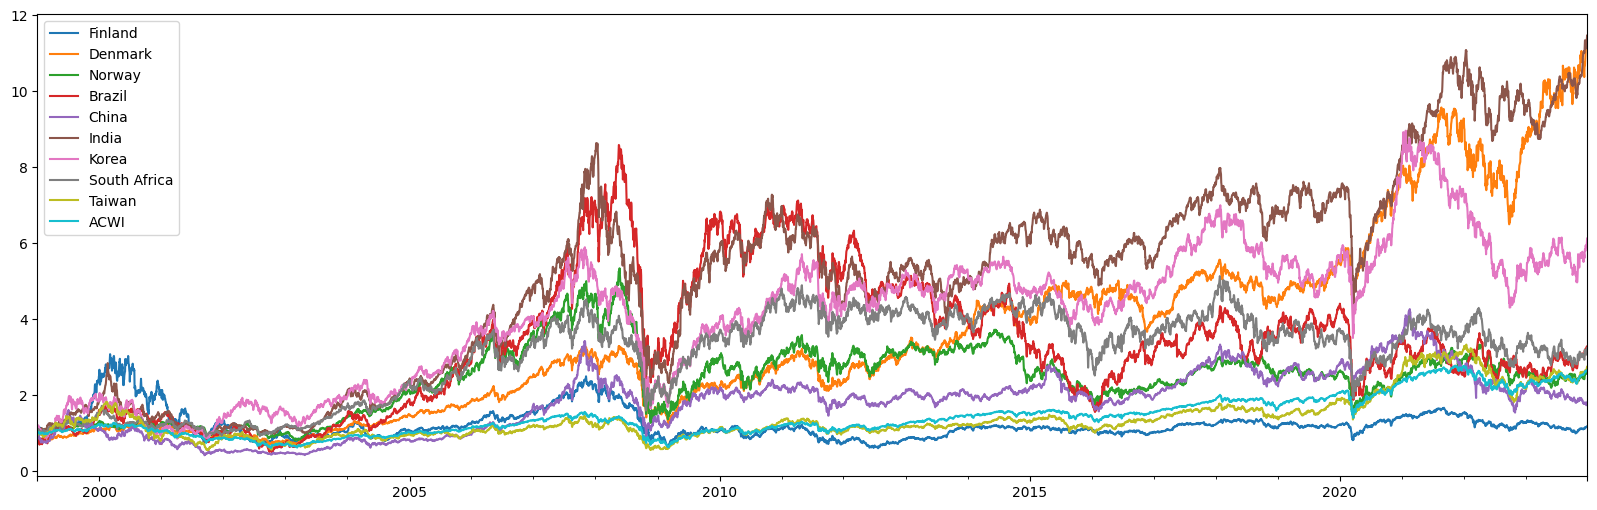

In [19]:
(msci_indexes/msci_indexes.iloc[0,:]).plot(figsize=(20,6))

In [17]:
def save_to_db(historic_data, category):
    sql_handler = SqlAlquemyInsertMarketDataHandler()

    for country in historic_data.columns:     
            print(country, end='')   
            values = historic_data[country].dropna()
            symbol_code = sql_handler.get_symbol_code(category, country)
            if (len(values) > 0) and symbol_code != '':
                sql_handler.save_to_db(symbol_code, values)
            else:
                print(' - skipped')

In [18]:
save_to_db(msci_indexes, 'MSCI Index')

Finland.................................Inserted 6521 records for MSCI_FIN
Denmark.................................Inserted 6521 records for MSCI_DEN
Norway.................................Inserted 6521 records for MSCI_NOR
Brazil.................................Inserted 6521 records for MSCI_BRA
China.................................Inserted 6521 records for MSCI_CHI
India.................................Inserted 6521 records for MSCI_IND
Korea.................................Inserted 6521 records for MSCI_KOR
South Africa.................................Inserted 6521 records for MSCI_SA
Taiwan.................................Inserted 6521 records for MSCI_TAI
ACWI.................................Inserted 6521 records for MSCI_ACWI
